importing library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

Defination of function

In [2]:
def GoldenCrossverSignal(name, point):
    path = f'../Data/{name}.csv'
    data = pd.read_csv(path,parse_dates=['Date'],index_col='Date') #using for removing the first index


    #data[-400:].Close.plot(figsize = (15,8)) #Plotting only Closed data & with last 400 data only


    data['20_SMA'] = data.Close.rolling(window=20, min_periods=1).mean()    #20 SMA's data
    data['50_SMA'] = data.Close.rolling(window=50, min_periods=1).mean()    #50 SMA's data

    data['Signal'] = 0
    data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'],1,0)    #numpy's function which check the condition and simply assisgn the value
    # 1 -> sell & 0 -> buy in data['signal']

    data['Position'] = data.Signal.diff()  #difference between upper and lower value  1 -> buy  -1 sell


    plt.figure(figsize = (20,10))

    # plot close price, short-term and long-term moving averages
    data.iloc[-point:]['Close'].plot(color = 'k', label= 'Close Price')
    data.iloc[-point:]['20_SMA'].plot(color = 'b',label = '20-day SMA')
    data.iloc[-point:]['50_SMA'].plot(color = 'g', label = '50-day SMA')

    # plotting buy signals
    plt.plot(data.iloc[-point:][data.iloc[-point:]['Position'] == 1].index,
         data.iloc[-point:]['20_SMA'][data.iloc[-point:]['Position'] == 1],
         '^', markersize = 15, color = 'g', label = 'buy')
    # plotting sell signals
    plt.plot(data.iloc[-point:][data.iloc[-point:]['Position'] == -1].index,
         data.iloc[-point:]['20_SMA'][data.iloc[-point:]['Position'] == -1],
         'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.title(name, fontsize = 20)
    plt.legend() #indications
    plt.grid()
    plt.show()

    #for table the data
    df_pos = data.iloc[-point:][(data.iloc[-point:]['Position'] == 1) | (data['Position'] == -1)].copy()
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')


    print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))


EXECUTING GOLDENCROSSOVERSIGNAL

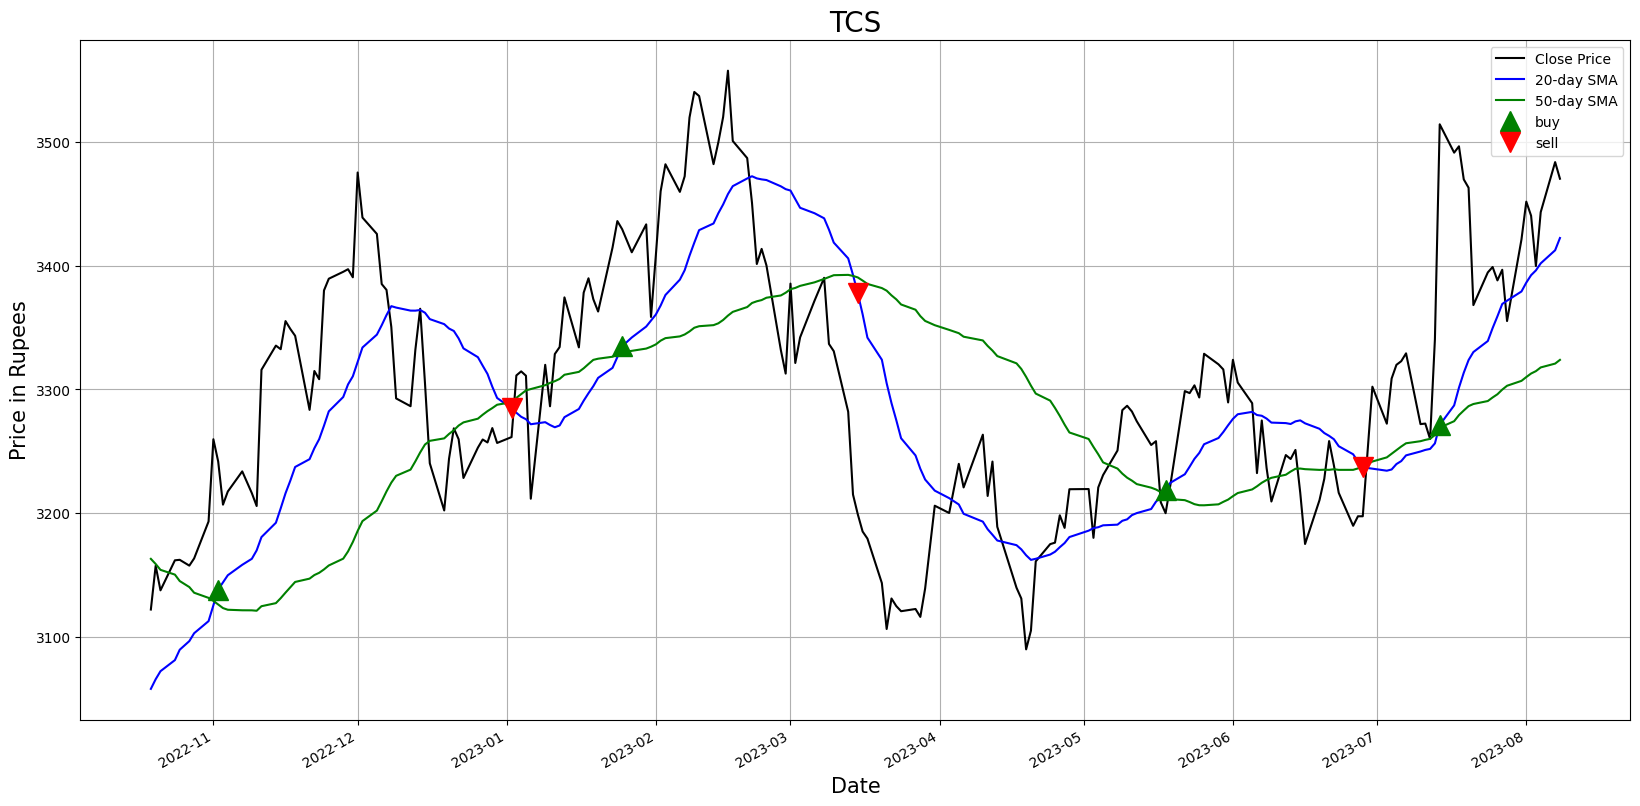

+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2022-11-02 00:00:00 | 3241.7  | Buy        |
| 2023-01-02 00:00:00 | 3261.45 | Sell       |
| 2023-01-25 00:00:00 | 3429.75 | Buy        |
| 2023-03-15 00:00:00 | 3198.9  | Sell       |
| 2023-05-18 00:00:00 | 3199.85 | Buy        |
| 2023-06-28 00:00:00 | 3197.35 | Sell       |
| 2023-07-14 00:00:00 | 3514.65 | Buy        |
+---------------------+---------+------------+


In [6]:
GoldenCrossverSignal('TCS', 200)